In [30]:
import pandas as pd # 판다스 모듈 갖고오기
import numpy as np # 넘피 모듈 갖고오기
import matplotlib.pyplot as plt # pyplot 모듈 갖고오기
import matplotlib as mpl # matplotlib 패키지 갖고오기
import matplotlib.font_manager as fm # font_manager 갖고오기
import datetime as dt # datatime 모듈 갖고오기

import SampleData as d # SampleData.py의 변수 사용
#import seaborn as sns
#mpl.rcParams['font.family'] = 'AppleGothic'
font_path=r'c:\WINDOWS\Fonts\H2MJRE.TTF' # 한글 출력 설정
myFont=fm.FontProperties(fname=font_path).get_name()
mpl.rc('font',family=myFont)



## 0. 자료 출처 소개
## 0.1. 팀 공통 anime 2023 data set
## 0.2. 일본 영화 전체 흥행 순위
## 0.3. 한국 영화 전체 흥행 순위

In [31]:
anime = pd.read_csv("../Data/anime-dataset-2023.csv")
japanMovieRank = pd.read_excel("../Data/일본 내 영화 순위 2.xlsx", sheet_name='korean')
koreanMovieRank = pd.read_excel("../Data/한국 내 영화 순위.xlsx", header=None)

## 1. 일본 영화 전체 흥행 순위 전처리

In [32]:
# 1.1. japanMovieRank 일본 영화 전체 흥행 순위 DataFrame 불러오기
japanMovieRank.head(20)

,순위,작품제목,배급사,흥행 수입(억 엔),공개일,자국 영화,Unnamed: 6
0,1,극장판 '귀멸의 칼날' 무한 열차편,도호/애니플렉스,404.3,2020-10-16,*,1. 극장판 '귀멸의 칼날' 무한 열차편 - Demon Slayer: Mugen T...
1,2,센과 치히로의 행방불명,도호,316.8,2001-07-20,*,2. 센과 치히로의 행방불명 - Spirited Away
2,3,타이타닉,FOX,277.7,1997-12-20,NaN,3. 타이타닉 - Titanic
3,4,겨울왕국,디즈니,255.0,2014-03-14,NaN,4. 겨울왕국 - Frozen
4,5,너의 이름은.,도호,251.7,2016-08-26,*,5. 너의 이름은. - Your Name.
5,6,ONE PIECE FILM RED,도에이,203.3,2022-08-06,*,6. ONE PIECE FILM RED - One Piece Film: Red
6,7,해리포터와 마법사의 돌,워너,203.0,2001-12-01,NaN,7. 해리포터와 마법사의 돌 - Harry Potter and the Sorcere...
7,8,모노노케 공주,도호,201.8,1997-07-12,*,8. 모노노케 공주 - Princess Mononoke
8,9,하울의 움직이는 성,도호,196.0,2004-11-20,*,9. 하울의 움직이는 성 - Howl's Moving Castle
9,10,춤추는 대수사선 THE MOVIE2 레인보우 브릿지를 봉쇄하라!,도호,173.5,2003-07-19,*,10. 춤추는 대수사선 THE MOVIE2 레인보우 브릿지를 봉쇄하라! - Bays...


In [33]:
# 1.2. 애니메이션 영화만 10개 추리기, 인덱스 다시 0부터 순차적으로 부여
jMR2 = japanMovieRank.iloc[[0,1,4,5,7,8,12,13,14,15]]
jMR2.reset_index(inplace=True)
jMR2

,index,순위,작품제목,배급사,흥행 수입(억 엔),공개일,자국 영화,Unnamed: 6
0,0,1,극장판 '귀멸의 칼날' 무한 열차편,도호/애니플렉스,404.3,2020-10-16,*,1. 극장판 '귀멸의 칼날' 무한 열차편 - Demon Slayer: Mugen T...
1,1,2,센과 치히로의 행방불명,도호,316.8,2001-07-20,*,2. 센과 치히로의 행방불명 - Spirited Away
2,4,5,너의 이름은.,도호,251.7,2016-08-26,*,5. 너의 이름은. - Your Name.
3,5,6,ONE PIECE FILM RED,도에이,203.3,2022-08-06,*,6. ONE PIECE FILM RED - One Piece Film: Red
4,7,8,모노노케 공주,도호,201.8,1997-07-12,*,8. 모노노케 공주 - Princess Mononoke
5,8,9,하울의 움직이는 성,도호,196.0,2004-11-20,*,9. 하울의 움직이는 성 - Howl's Moving Castle
6,12,13,THE FIRST SLAM DUNK,도에이,157.3,2022-12-03,*,13. THE FIRST SLAM DUNK - The First Slam Dunk
7,13,14,절벽 위의 포뇨,도호,155.0,2008-07-19,*,14. 절벽 위의 포뇨 - Ponyo
8,14,15,참새의 문단속,도호,149.4,2022-11-11,*,15. 참새의 문단속 - Sparrow's Hotel (Note: This migh...
9,15,16,날씨의 아이,도호,142.3,2019-07-19,*,16. 날씨의 아이 - Weathering with You


## 2. 한국 영화 전체 흥행 순위 전처리


In [34]:
# 2.1 koreanMovieRank 한국 내 애니 영화 전체 흥행 순위 DataFrame 불러오기
koreanMovieRank

,0,1,2,3,4
0,1위,스즈메의 문단속,2022년,신카이 마코토,"5,575,035명"
1,2위,더 퍼스트 슬램덩크,2022년,이노우에 다케히코,"4,856,640명"
2,3위,너의 이름은.,2016년,신카이 마코토,"3,889,286명"
3,4위,하울의 움직이는 성,2004년,미야자키 하야오,"3,015,165명"
4,5위,극장판 귀멸의 칼날: 무한열차편,2020년,소토자키 하루오,"2,189,110명"
5,6위,센과 치히로의 행방불명,2001년,미야자키 하야오,"2,167,573명"
6,7위,그대들은 어떻게 살 것인가,2023년,미야자키 하야오,"2,011,871명"
7,8위,벼랑 위의 포뇨,2008년,미야자키 하야오,"1,521,842명"
8,9위,마루 밑 아리에티,2010년,요네바야시 히로마사,"1,086,004명"
9,10위,신차원! 짱구는 못말려 더 무비: 초능력 대결전 ~날아라 수제김밥~,2023년,오오네 히토시,"846,432명"


In [35]:
# 2.2 KMR 내 컬럼명 추가하기
KMRcolumns = ['순위(kor)', '작품제목', '제작 연도(kor)', '감독(kor)', '관객 수(kor)']
koreanMovieRank.columns = KMRcolumns
koreanMovieRank

,순위(kor),작품제목,제작 연도(kor),감독(kor),관객 수(kor)
0,1위,스즈메의 문단속,2022년,신카이 마코토,"5,575,035명"
1,2위,더 퍼스트 슬램덩크,2022년,이노우에 다케히코,"4,856,640명"
2,3위,너의 이름은.,2016년,신카이 마코토,"3,889,286명"
3,4위,하울의 움직이는 성,2004년,미야자키 하야오,"3,015,165명"
4,5위,극장판 귀멸의 칼날: 무한열차편,2020년,소토자키 하루오,"2,189,110명"
5,6위,센과 치히로의 행방불명,2001년,미야자키 하야오,"2,167,573명"
6,7위,그대들은 어떻게 살 것인가,2023년,미야자키 하야오,"2,011,871명"
7,8위,벼랑 위의 포뇨,2008년,미야자키 하야오,"1,521,842명"
8,9위,마루 밑 아리에티,2010년,요네바야시 히로마사,"1,086,004명"
9,10위,신차원! 짱구는 못말려 더 무비: 초능력 대결전 ~날아라 수제김밥~,2023년,오오네 히토시,"846,432명"


## # 2.3 작품제목 통일하기

In [36]:
totalOuter = pd.merge(jMR2, koreanMovieRank, how = 'outer')
totalOuter

,index,순위,작품제목,배급사,흥행 수입(억 엔),공개일,자국 영화,Unnamed: 6,순위(kor),제작 연도(kor),감독(kor),관객 수(kor)
0,0.0,1.0,극장판 '귀멸의 칼날' 무한 열차편,도호/애니플렉스,404.3,2020-10-16,*,1. 극장판 '귀멸의 칼날' 무한 열차편 - Demon Slayer: Mugen T...,NaN,NaN,NaN,NaN
1,1.0,2.0,센과 치히로의 행방불명,도호,316.8,2001-07-20,*,2. 센과 치히로의 행방불명 - Spirited Away,6위,2001년,미야자키 하야오,"2,167,573명"
2,4.0,5.0,너의 이름은.,도호,251.7,2016-08-26,*,5. 너의 이름은. - Your Name.,3위,2016년,신카이 마코토,"3,889,286명"
3,5.0,6.0,ONE PIECE FILM RED,도에이,203.3,2022-08-06,*,6. ONE PIECE FILM RED - One Piece Film: Red,NaN,NaN,NaN,NaN
4,7.0,8.0,모노노케 공주,도호,201.8,1997-07-12,*,8. 모노노케 공주 - Princess Mononoke,NaN,NaN,NaN,NaN
5,8.0,9.0,하울의 움직이는 성,도호,196.0,2004-11-20,*,9. 하울의 움직이는 성 - Howl's Moving Castle,4위,2004년,미야자키 하야오,"3,015,165명"
6,12.0,13.0,THE FIRST SLAM DUNK,도에이,157.3,2022-12-03,*,13. THE FIRST SLAM DUNK - The First Slam Dunk,NaN,NaN,NaN,NaN
7,13.0,14.0,절벽 위의 포뇨,도호,155.0,2008-07-19,*,14. 절벽 위의 포뇨 - Ponyo,NaN,NaN,NaN,NaN
8,14.0,15.0,참새의 문단속,도호,149.4,2022-11-11,*,15. 참새의 문단속 - Sparrow's Hotel (Note: This migh...,NaN,NaN,NaN,NaN
9,15.0,16.0,날씨의 아이,도호,142.3,2019-07-19,*,16. 날씨의 아이 - Weathering with You,NaN,NaN,NaN,NaN


In [37]:
pd.merge(jMR2['작품제목'], koreanMovieRank['작품제목'], how = 'outer')

,작품제목
0,극장판 '귀멸의 칼날' 무한 열차편
1,센과 치히로의 행방불명
2,너의 이름은.
3,ONE PIECE FILM RED
4,모노노케 공주
5,하울의 움직이는 성
6,THE FIRST SLAM DUNK
7,절벽 위의 포뇨
8,참새의 문단속
9,날씨의 아이


In [38]:

'''
함수로 바꾸기
# iList = [0,6,8,7]
# jList = [4,1,0,7]
#
# while i < len(iList):
#
#     jMR2['작품제목'][iList[i]] = jMR2['작품제목'][iList[i]].replace(jMR2['작품제목'][iList[i]], koreanMovieRank['작품제목'][jList[j]])
#     i += 1
'''


iList = [0,6,8,7]
jList = [4,1,0,7]

for i, data in enumerate(iList):
    jMR2['작품제목'][data] = jMR2['작품제목'][data].replace(jMR2['작품제목'][data], koreanMovieRank['작품제목'][jList[i]])

# jMR2['작품제목'][6] = jMR2['작품제목'][6].replace(jMR2['작품제목'][6], koreanMovieRank['작품제목'][1])
# jMR2['작품제목'][8] = jMR2['작품제목'][8].replace(jMR2['작품제목'][8], koreanMovieRank['작품제목'][0])
# jMR2['작품제목'][7] = jMR2['작품제목'][7].replace(jMR2['작품제목'][7], koreanMovieRank['작품제목'][7])



C:\Users\mathn\AppData\Local\Temp\ipykernel_20464\4097695436.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jMR2['작품제목'][data] = jMR2['작품제목'][data].replace(jMR2['작품제목'][data], koreanMovieRank['작품제목'][jList[i]])
C:\Users\mathn\AppData\Local\Temp\ipykernel_20464\4097695436.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jMR2['작품제목'][data] = jMR2['작품제목'][data].replace(jMR2['작품제목'][data], koreanMovieRank['작품제목'][jList[i]])
C:\Users\mathn\AppData\Local\Temp\ipykernel_20464\4097695436.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documenta

In [39]:
jMR2.info(),koreanMovieRank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   index       10 non-null     int64         
 1   순위          10 non-null     int64         
 2   작품제목        10 non-null     object        
 3   배급사         10 non-null     object        
 4   흥행 수입(억 엔)  10 non-null     float64       
 5   공개일         10 non-null     datetime64[ns]
 6   자국 영화       10 non-null     object        
 7   Unnamed: 6  10 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 768.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   순위(kor)     10 non-null     object
 1   작품제목        10 non-null     object
 2   제작 연도(kor)  10 non-null     object
 3   감독(kor)     10 non-null    

(None, None)

In [40]:
jMR2

,index,순위,작품제목,배급사,흥행 수입(억 엔),공개일,자국 영화,Unnamed: 6
0,0,1,극장판 귀멸의 칼날: 무한열차편,도호/애니플렉스,404.3,2020-10-16,*,1. 극장판 '귀멸의 칼날' 무한 열차편 - Demon Slayer: Mugen T...
1,1,2,센과 치히로의 행방불명,도호,316.8,2001-07-20,*,2. 센과 치히로의 행방불명 - Spirited Away
2,4,5,너의 이름은.,도호,251.7,2016-08-26,*,5. 너의 이름은. - Your Name.
3,5,6,ONE PIECE FILM RED,도에이,203.3,2022-08-06,*,6. ONE PIECE FILM RED - One Piece Film: Red
4,7,8,모노노케 공주,도호,201.8,1997-07-12,*,8. 모노노케 공주 - Princess Mononoke
5,8,9,하울의 움직이는 성,도호,196.0,2004-11-20,*,9. 하울의 움직이는 성 - Howl's Moving Castle
6,12,13,더 퍼스트 슬램덩크,도에이,157.3,2022-12-03,*,13. THE FIRST SLAM DUNK - The First Slam Dunk
7,13,14,벼랑 위의 포뇨,도호,155.0,2008-07-19,*,14. 절벽 위의 포뇨 - Ponyo
8,14,15,스즈메의 문단속,도호,149.4,2022-11-11,*,15. 참새의 문단속 - Sparrow's Hotel (Note: This migh...
9,15,16,날씨의 아이,도호,142.3,2019-07-19,*,16. 날씨의 아이 - Weathering with You


In [41]:
totalInner = pd.merge(jMR2, koreanMovieRank, left_on="작품제목", right_on="작품제목")
totalInner

,index,순위,작품제목,배급사,흥행 수입(억 엔),공개일,자국 영화,Unnamed: 6,순위(kor),제작 연도(kor),감독(kor),관객 수(kor)
0,0,1,극장판 귀멸의 칼날: 무한열차편,도호/애니플렉스,404.3,2020-10-16,*,1. 극장판 '귀멸의 칼날' 무한 열차편 - Demon Slayer: Mugen T...,5위,2020년,소토자키 하루오,"2,189,110명"
1,1,2,센과 치히로의 행방불명,도호,316.8,2001-07-20,*,2. 센과 치히로의 행방불명 - Spirited Away,6위,2001년,미야자키 하야오,"2,167,573명"
2,4,5,너의 이름은.,도호,251.7,2016-08-26,*,5. 너의 이름은. - Your Name.,3위,2016년,신카이 마코토,"3,889,286명"
3,8,9,하울의 움직이는 성,도호,196.0,2004-11-20,*,9. 하울의 움직이는 성 - Howl's Moving Castle,4위,2004년,미야자키 하야오,"3,015,165명"
4,12,13,더 퍼스트 슬램덩크,도에이,157.3,2022-12-03,*,13. THE FIRST SLAM DUNK - The First Slam Dunk,2위,2022년,이노우에 다케히코,"4,856,640명"
5,13,14,벼랑 위의 포뇨,도호,155.0,2008-07-19,*,14. 절벽 위의 포뇨 - Ponyo,8위,2008년,미야자키 하야오,"1,521,842명"
6,14,15,스즈메의 문단속,도호,149.4,2022-11-11,*,15. 참새의 문단속 - Sparrow's Hotel (Note: This migh...,1위,2022년,신카이 마코토,"5,575,035명"


In [42]:
total = totalInner[['작품제목', '순위', '순위(kor)', '흥행 수입(억 엔)', '제작 연도(kor)', '감독(kor)', '관객 수(kor)']]
total

,작품제목,순위,순위(kor),흥행 수입(억 엔),제작 연도(kor),감독(kor),관객 수(kor)
0,극장판 귀멸의 칼날: 무한열차편,1,5위,404.3,2020년,소토자키 하루오,"2,189,110명"
1,센과 치히로의 행방불명,2,6위,316.8,2001년,미야자키 하야오,"2,167,573명"
2,너의 이름은.,5,3위,251.7,2016년,신카이 마코토,"3,889,286명"
3,하울의 움직이는 성,9,4위,196.0,2004년,미야자키 하야오,"3,015,165명"
4,더 퍼스트 슬램덩크,13,2위,157.3,2022년,이노우에 다케히코,"4,856,640명"
5,벼랑 위의 포뇨,14,8위,155.0,2008년,미야자키 하야오,"1,521,842명"
6,스즈메의 문단속,15,1위,149.4,2022년,신카이 마코토,"5,575,035명"


In [43]:
JAPTitleList = ['Kimetsu no Yaiba Movie: Mugen Ressha-hen',
             'Sen to Chihiro no Kamikakushi',
             'Kimi no Na wa.',
             'Howl no Ugoku Shiro',
             'The First Slam Dunk',
             'Gake no Ue no Ponyo',
             'Suzume no Tojimari'
             ]
total['Name'] = JAPTitleList
total

C:\Users\mathn\AppData\Local\Temp\ipykernel_20464\27747797.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total['Name'] = JAPTitleList


,작품제목,순위,순위(kor),흥행 수입(억 엔),제작 연도(kor),감독(kor),관객 수(kor),Name
0,극장판 귀멸의 칼날: 무한열차편,1,5위,404.3,2020년,소토자키 하루오,"2,189,110명",Kimetsu no Yaiba Movie: Mugen Ressha-hen
1,센과 치히로의 행방불명,2,6위,316.8,2001년,미야자키 하야오,"2,167,573명",Sen to Chihiro no Kamikakushi
2,너의 이름은.,5,3위,251.7,2016년,신카이 마코토,"3,889,286명",Kimi no Na wa.
3,하울의 움직이는 성,9,4위,196.0,2004년,미야자키 하야오,"3,015,165명",Howl no Ugoku Shiro
4,더 퍼스트 슬램덩크,13,2위,157.3,2022년,이노우에 다케히코,"4,856,640명",The First Slam Dunk
5,벼랑 위의 포뇨,14,8위,155.0,2008년,미야자키 하야오,"1,521,842명",Gake no Ue no Ponyo
6,스즈메의 문단속,15,1위,149.4,2022년,신카이 마코토,"5,575,035명",Suzume no Tojimari


In [44]:
anime2 = anime[anime["Name"].isin(JAPTitleList)]

anime3 = pd.merge(total, anime2)
anime3

,작품제목,순위,순위(kor),흥행 수입(억 엔),제작 연도(kor),감독(kor),관객 수(kor),Name,anime_id,English name,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,극장판 귀멸의 칼날: 무한열차편,1,5위,404.3,2020년,소토자키 하루오,"2,189,110명",Kimetsu no Yaiba Movie: Mugen Ressha-hen,40456,Demon Slayer: Kimetsu no Yaiba - The Movie: Mu...,...,ufotable,Manga,1 hr 56 min,R - 17+ (violence & profanity),75.0,79,12766,923480.0,1399607,https://cdn.myanimelist.net/images/anime/1704/...
1,센과 치히로의 행방불명,2,6위,316.8,2001년,미야자키 하야오,"2,167,573명",Sen to Chihiro no Kamikakushi,199,Spirited Away,...,Studio Ghibli,Original,2 hr 4 min,PG - Children,36.0,44,31139,1234780.0,1760676,https://cdn.myanimelist.net/images/anime/6/795...
2,너의 이름은.,5,3위,251.7,2016년,신카이 마코토,"3,889,286명",Kimi no Na wa.,32281,Your Name.,...,CoMix Wave Films,Original,1 hr 46 min,PG-13 - Teens 13 or older,27.0,11,87268,1807089.0,2597495,https://cdn.myanimelist.net/images/anime/5/870...
3,하울의 움직이는 성,9,4위,196.0,2004년,미야자키 하야오,"3,015,165명",Howl no Ugoku Shiro,431,Howl's Moving Castle,...,Studio Ghibli,Novel,1 hr 59 min,G - All Ages,61.0,97,26858,866696.0,1253703,https://cdn.myanimelist.net/images/anime/5/758...
4,더 퍼스트 슬램덩크,13,2위,157.3,2022년,이노우에 다케히코,"4,856,640명",The First Slam Dunk,45649,UNKNOWN,...,"Toei Animation, DandeLion Animation Studio",Manga,2 hr 4 min,PG-13 - Teens 13 or older,73.0,4638,161,2456.0,19419,https://cdn.myanimelist.net/images/anime/1745/...
5,벼랑 위의 포뇨,14,8위,155.0,2008년,미야자키 하야오,"1,521,842명",Gake no Ue no Ponyo,2890,Ponyo,...,Studio Ghibli,Original,1 hr 40 min,G - All Ages,689.0,374,3766,360594.0,542825,https://cdn.myanimelist.net/images/anime/7/897...
6,스즈메의 문단속,15,1위,149.4,2022년,신카이 마코토,"5,575,035명",Suzume no Tojimari,50594,Suzume,...,CoMix Wave Films,Original,2 hr 1 min,PG-13 - Teens 13 or older,164.0,991,3120,81585.0,226369,https://cdn.myanimelist.net/images/anime/1598/...


In [45]:
anime3kor = []
anime3year = []
anime3cust = []

for i in anime3['순위(kor)']:
    anime3kor.append(i[0])
for i in anime3['제작 연도(kor)']:
    anime3year.append(i[:-1])
for i in anime3['관객 수(kor)']:
    i2 = i[:-1].replace(',','')
    anime3cust.append(i2)
    
    
anime3['한국순위'] = anime3kor
anime3['제작연도'] = anime3year
anime3['관객 수'] = anime3cust
# anime3['관객 수 ']

In [46]:
anime4 = anime3[['작품제목', 'Name', '순위', '한국순위', '흥행 수입(억 엔)', '제작연도', '감독(kor)', '관객 수', 'Genres', 'Rank', 'Favorites', 'Popularity', 'Members']]
anime4['한국순위'] = anime3['한국순위'].astype('int64')
anime4['제작연도'] = anime3['제작연도'].astype('int64')
anime4['관객 수'] = anime3['관객 수'].astype('int64')
anime4['Rank'] = anime3['Rank'].astype('float64')
anime4

C:\Users\mathn\AppData\Local\Temp\ipykernel_20464\648995850.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anime4['한국순위'] = anime3['한국순위'].astype('int64')
C:\Users\mathn\AppData\Local\Temp\ipykernel_20464\648995850.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anime4['제작연도'] = anime3['제작연도'].astype('int64')
C:\Users\mathn\AppData\Local\Temp\ipykernel_20464\648995850.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

,작품제목,Name,순위,한국순위,흥행 수입(억 엔),제작연도,감독(kor),관객 수,Genres,Rank,Favorites,Popularity,Members
0,극장판 귀멸의 칼날: 무한열차편,Kimetsu no Yaiba Movie: Mugen Ressha-hen,1,5,404.3,2020,소토자키 하루오,2189110,"Action, Fantasy",75.0,12766,79,1399607
1,센과 치히로의 행방불명,Sen to Chihiro no Kamikakushi,2,6,316.8,2001,미야자키 하야오,2167573,"Adventure, Award Winning, Supernatural",36.0,31139,44,1760676
2,너의 이름은.,Kimi no Na wa.,5,3,251.7,2016,신카이 마코토,3889286,"Award Winning, Drama, Supernatural",27.0,87268,11,2597495
3,하울의 움직이는 성,Howl no Ugoku Shiro,9,4,196.0,2004,미야자키 하야오,3015165,"Adventure, Award Winning, Drama, Fantasy, Romance",61.0,26858,97,1253703
4,더 퍼스트 슬램덩크,The First Slam Dunk,13,2,157.3,2022,이노우에 다케히코,4856640,"Award Winning, Sports",73.0,161,4638,19419
5,벼랑 위의 포뇨,Gake no Ue no Ponyo,14,8,155.0,2008,미야자키 하야오,1521842,"Adventure, Award Winning, Fantasy",689.0,3766,374,542825
6,스즈메의 문단속,Suzume no Tojimari,15,1,149.4,2022,신카이 마코토,5575035,"Adventure, Fantasy",164.0,3120,991,226369


In [47]:
anime4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   작품제목        7 non-null      object 
 1   Name        7 non-null      object 
 2   순위          7 non-null      int64  
 3   한국순위        7 non-null      int64  
 4   흥행 수입(억 엔)  7 non-null      float64
 5   제작연도        7 non-null      int64  
 6   감독(kor)     7 non-null      object 
 7   관객 수        7 non-null      int64  
 8   Genres      7 non-null      object 
 9   Rank        7 non-null      float64
 10  Favorites   7 non-null      int64  
 11  Popularity  7 non-null      int64  
 12  Members     7 non-null      int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 856.0+ bytes


In [48]:
anime4.sort_values('순위', ascending=1)

,작품제목,Name,순위,한국순위,흥행 수입(억 엔),제작연도,감독(kor),관객 수,Genres,Rank,Favorites,Popularity,Members
0,극장판 귀멸의 칼날: 무한열차편,Kimetsu no Yaiba Movie: Mugen Ressha-hen,1,5,404.3,2020,소토자키 하루오,2189110,"Action, Fantasy",75.0,12766,79,1399607
1,센과 치히로의 행방불명,Sen to Chihiro no Kamikakushi,2,6,316.8,2001,미야자키 하야오,2167573,"Adventure, Award Winning, Supernatural",36.0,31139,44,1760676
2,너의 이름은.,Kimi no Na wa.,5,3,251.7,2016,신카이 마코토,3889286,"Award Winning, Drama, Supernatural",27.0,87268,11,2597495
3,하울의 움직이는 성,Howl no Ugoku Shiro,9,4,196.0,2004,미야자키 하야오,3015165,"Adventure, Award Winning, Drama, Fantasy, Romance",61.0,26858,97,1253703
4,더 퍼스트 슬램덩크,The First Slam Dunk,13,2,157.3,2022,이노우에 다케히코,4856640,"Award Winning, Sports",73.0,161,4638,19419
5,벼랑 위의 포뇨,Gake no Ue no Ponyo,14,8,155.0,2008,미야자키 하야오,1521842,"Adventure, Award Winning, Fantasy",689.0,3766,374,542825
6,스즈메의 문단속,Suzume no Tojimari,15,1,149.4,2022,신카이 마코토,5575035,"Adventure, Fantasy",164.0,3120,991,226369


In [49]:
anime4.sort_values('한국순위', ascending=1)

,작품제목,Name,순위,한국순위,흥행 수입(억 엔),제작연도,감독(kor),관객 수,Genres,Rank,Favorites,Popularity,Members
6,스즈메의 문단속,Suzume no Tojimari,15,1,149.4,2022,신카이 마코토,5575035,"Adventure, Fantasy",164.0,3120,991,226369
4,더 퍼스트 슬램덩크,The First Slam Dunk,13,2,157.3,2022,이노우에 다케히코,4856640,"Award Winning, Sports",73.0,161,4638,19419
2,너의 이름은.,Kimi no Na wa.,5,3,251.7,2016,신카이 마코토,3889286,"Award Winning, Drama, Supernatural",27.0,87268,11,2597495
3,하울의 움직이는 성,Howl no Ugoku Shiro,9,4,196.0,2004,미야자키 하야오,3015165,"Adventure, Award Winning, Drama, Fantasy, Romance",61.0,26858,97,1253703
0,극장판 귀멸의 칼날: 무한열차편,Kimetsu no Yaiba Movie: Mugen Ressha-hen,1,5,404.3,2020,소토자키 하루오,2189110,"Action, Fantasy",75.0,12766,79,1399607
1,센과 치히로의 행방불명,Sen to Chihiro no Kamikakushi,2,6,316.8,2001,미야자키 하야오,2167573,"Adventure, Award Winning, Supernatural",36.0,31139,44,1760676
5,벼랑 위의 포뇨,Gake no Ue no Ponyo,14,8,155.0,2008,미야자키 하야오,1521842,"Adventure, Award Winning, Fantasy",689.0,3766,374,542825


In [50]:
# def animeFunc(a,b):
#     plt.figure(figsize=(5,5))
#     plt.bar(anime4[a],anime4[b])
#     plt.xlabel(a)
#     plt.ylabel(b)
#     plt.title(a '/' b)
#     plt.show()
    
    
# animeFunc('흥행 수입(억 엔)')
# # animeFunc('관객 수')
# # animeFunc('Rank')
# # animeFunc('Favorites')
# # animeFunc('Popularity')
# # animeFunc('Members')


In [51]:
# df.set_index('Category', inplace=True)
anime5 = anime4.set_index('작품제목')
# ax = anime5.plot(kind='bar')
anime5

,Name,순위,한국순위,흥행 수입(억 엔),제작연도,감독(kor),관객 수,Genres,Rank,Favorites,Popularity,Members
작품제목,,,,,,,,,,,,
극장판 귀멸의 칼날: 무한열차편,Kimetsu no Yaiba Movie: Mugen Ressha-hen,1,5,404.3,2020,소토자키 하루오,2189110,"Action, Fantasy",75.0,12766,79,1399607
센과 치히로의 행방불명,Sen to Chihiro no Kamikakushi,2,6,316.8,2001,미야자키 하야오,2167573,"Adventure, Award Winning, Supernatural",36.0,31139,44,1760676
너의 이름은.,Kimi no Na wa.,5,3,251.7,2016,신카이 마코토,3889286,"Award Winning, Drama, Supernatural",27.0,87268,11,2597495
하울의 움직이는 성,Howl no Ugoku Shiro,9,4,196.0,2004,미야자키 하야오,3015165,"Adventure, Award Winning, Drama, Fantasy, Romance",61.0,26858,97,1253703
더 퍼스트 슬램덩크,The First Slam Dunk,13,2,157.3,2022,이노우에 다케히코,4856640,"Award Winning, Sports",73.0,161,4638,19419
벼랑 위의 포뇨,Gake no Ue no Ponyo,14,8,155.0,2008,미야자키 하야오,1521842,"Adventure, Award Winning, Fantasy",689.0,3766,374,542825
스즈메의 문단속,Suzume no Tojimari,15,1,149.4,2022,신카이 마코토,5575035,"Adventure, Fantasy",164.0,3120,991,226369


In [52]:
anime4.to_csv('anime4.csv', index=False)

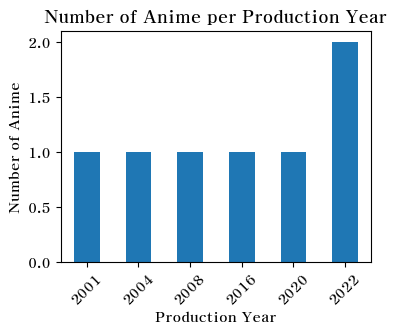

In [53]:
anime_year = anime5['제작연도'].value_counts().sort_index()

plt.figure(figsize=(4, 3))
anime_year.plot(kind='bar')
plt.xlabel('Production Year')
plt.ylabel('Number of Anime')
plt.title('Number of Anime per Production Year')
plt.xticks(rotation=45)
plt.show()


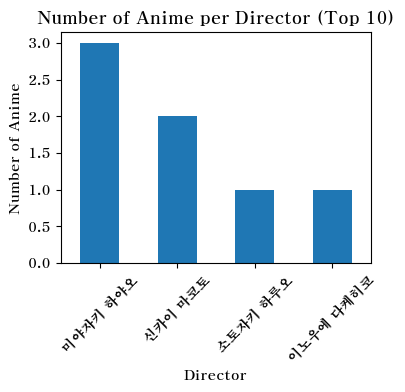

In [54]:
anime_director = anime5['감독(kor)'].value_counts()

top_directors = anime_director.head(10)

# Plotting
plt.figure(figsize=(4, 3))
top_directors.plot(kind='bar')
plt.xlabel('Director')
plt.ylabel('Number of Anime')
plt.title('Number of Anime per Director (Top 10)')
plt.xticks(rotation=45)
plt.show()


In [55]:
# def plotting(a,b,c,d,e):
#     plt.figure(figsize=(4, 3))
#     anime_per_year.plot(kind='bar')
#     plt.xlabel('Production Year')
#     plt.ylabel('Number of Anime')
#     plt.title('Number of Anime per Production Year')
#     plt.xticks(rotation=45)
#     plt.show()

In [56]:
sns_columns = ['흥행 수입(억 엔)', '관객 수', 'Rank', 'Favorites', 'Popularity', 'Members']
selected_anime5 = anime5[sns_columns]

# Plotting pairplot for the selected columns
sns.pairplot(selected_anime5)
plt.show()


NameError: name 'sns' is not defined

In [ ]:
anime5Corr = anime5.corr(numeric_only=True)
anime5Corr

,순위,한국순위,흥행 수입(억 엔),제작연도,관객 수,Rank,Favorites,Popularity,Members
순위,1.000000,-0.278028,-0.947781,0.265628,0.482785,0.531101,-0.502412,0.490454,-0.790319
한국순위,-0.278028,1.000000,0.291491,-0.666723,-0.962330,0.605626,-0.068859,-0.470542,0.201032
흥행 수입(억 엔),-0.947781,0.291491,1.000000,-0.089200,-0.490363,-0.424245,0.273364,-0.455083,0.611731
제작연도,0.265628,-0.666723,-0.089200,1.000000,0.666879,-0.159561,-0.185445,0.515614,-0.361134
관객 수,0.482785,-0.962330,-0.490363,0.666879,1.000000,-0.410292,-0.027867,0.558445,-0.351968
Rank,0.531101,0.605626,-0.424245,-0.159561,-0.410292,1.000000,-0.398808,-0.095485,-0.403664
Favorites,-0.502412,-0.068859,0.273364,-0.185445,-0.027867,-0.398808,1.000000,-0.438904,0.904515
Popularity,0.490454,-0.470542,-0.455083,0.515614,0.558445,-0.095485,-0.438904,1.000000,-0.656623
Members,-0.790319,0.201032,0.611731,-0.361134,-0.351968,-0.403664,0.904515,-0.656623,1.000000


/Users/sml/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: >

/Users/sml/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/Users/sml/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


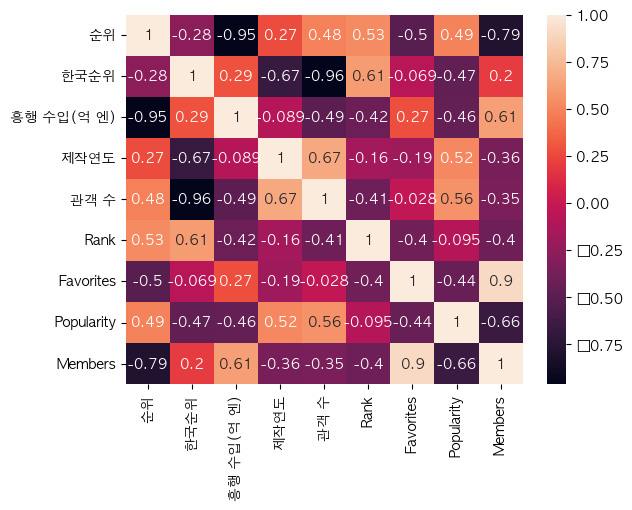

In [ ]:
sns.heatmap(anime5Corr, annot=True)

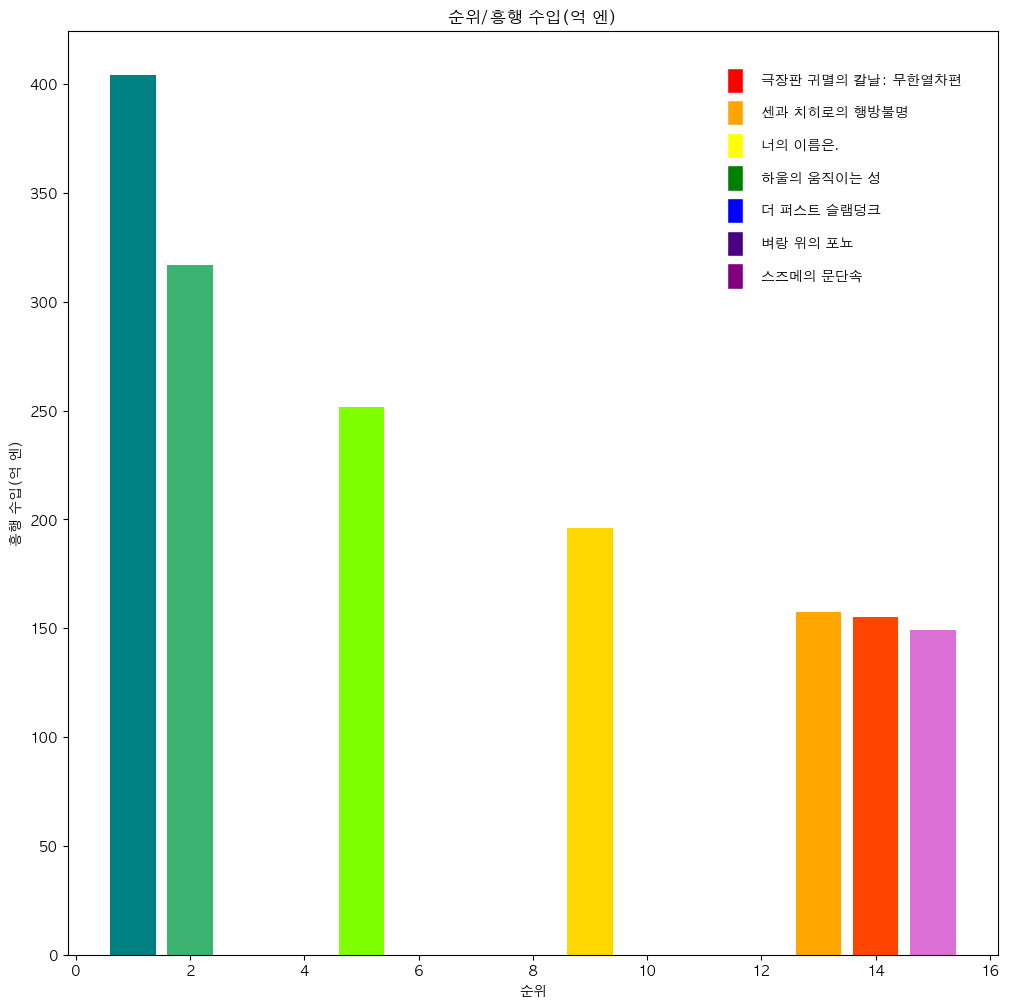

In [ ]:

def animeFunc(a,b):
    plt.figure(figsize=(12,12))
    colorList = ['#008080', '#3CB371', '#7FFF00', '#FFD700', '#FFA500', '#FF4500', '#DA70D6']
    plt.bar(anime4[a],anime4[b], color=colorList)
    plt.xlabel(a)
    plt.ylabel(b)
    plt.title(a + '/' + b)
#     plt.legend(i for i in list(anime5.index))
#     plt.legend('극장판 귀멸의 칼날: 무한열차편', '센과 치히로의 행방불명', '너의 이름은.', '하울의 움직이는 성', '더 퍼스트 슬램덩크', '벼랑 위의 포뇨', '스즈메의 문단속')
    box = {'facecolor':'white', 'edgecolor' : 'white'}
    box1 = {'facecolor' : 'red', 'edgecolor' : 'white'}
    plt.text(12, 400, '극장판 귀멸의 칼날: 무한열차편', bbox=box)
    plt.text(11.5, 400, ' ', bbox=box1)
    box2 = {'facecolor' : 'orange', 'edgecolor' : 'white'}
    plt.text(12, 385, '센과 치히로의 행방불명', bbox=box)
    plt.text(11.5, 385, ' ', bbox=box2)    
    box3 = {'facecolor' : 'yellow', 'edgecolor' : 'white'}
    plt.text(12, 370, '너의 이름은.', bbox=box)
    plt.text(11.5, 370, ' ', bbox=box3) 
    box4 = {'facecolor' : 'green', 'edgecolor' : 'white'}
    plt.text(12, 355, '하울의 움직이는 성', bbox=box)
    plt.text(11.5, 355, ' ', bbox=box4) 
    box5 = {'facecolor' : 'blue', 'edgecolor' : 'white'}
    plt.text(12, 340, '더 퍼스트 슬램덩크', bbox=box)
    plt.text(11.5, 340, ' ', bbox=box5) 
    box6 = {'facecolor' : 'indigo', 'edgecolor' : 'white'}
    plt.text(12, 325, '벼랑 위의 포뇨', bbox=box)
    plt.text(11.5, 325, ' ', bbox=box6)     
    box7 = {'facecolor' : 'purple', 'edgecolor' : 'white'}
    plt.text(12, 310, '스즈메의 문단속', bbox=box)
    plt.text(11.5, 310, ' ', bbox=box7)       
#     plt.text(12, 400, '극장판 귀멸의 칼날: 무한열차편', bbox=box)
#     plt.text(11.5, 400, ' ', bbox=box1)
    plt.show()
    
    
animeFunc('순위', '흥행 수입(억 엔)')

In [ ]:
type(anime5.index)

pandas.core.indexes.base.Index

In [ ]:
list(anime5.index)

['극장판 귀멸의 칼날: 무한열차편',
 '센과 치히로의 행방불명',
 '너의 이름은.',
 '하울의 움직이는 성',
 '더 퍼스트 슬램덩크',
 '벼랑 위의 포뇨',
 '스즈메의 문단속']

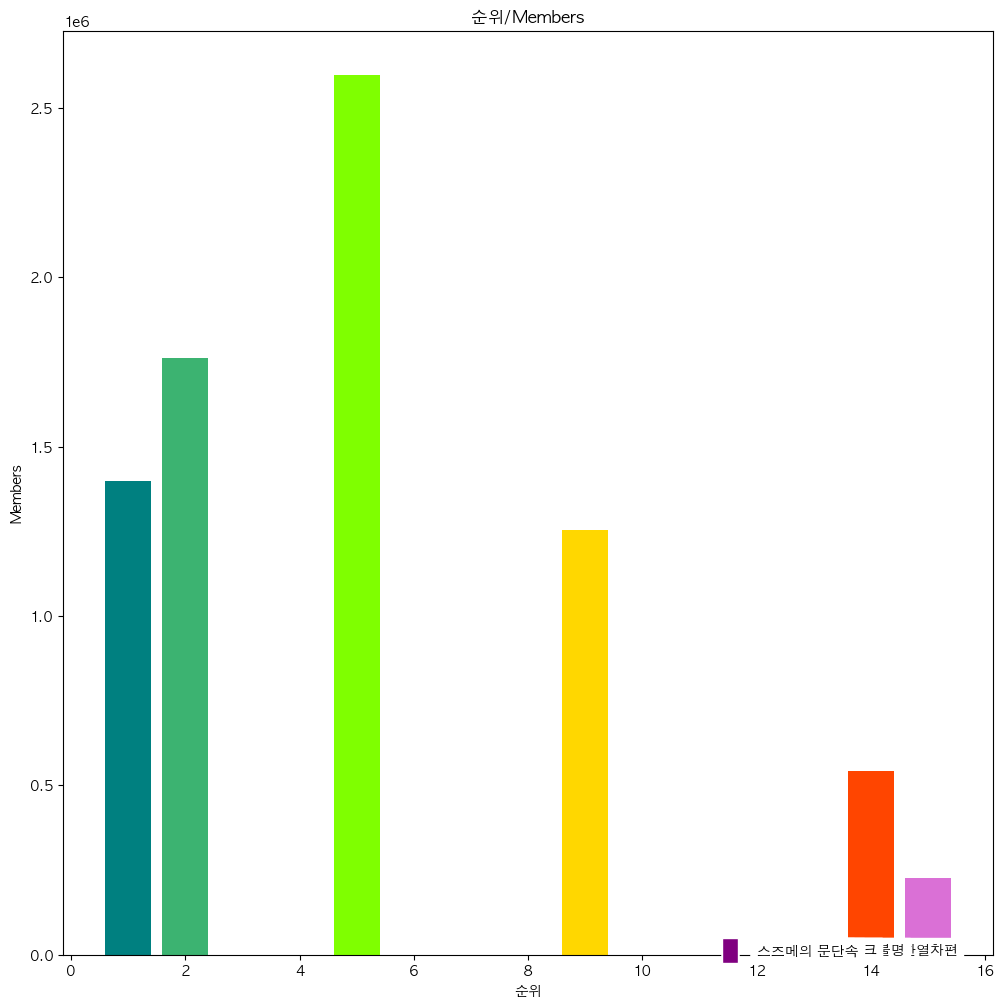

In [ ]:
animeFunc('순위', 'Members')

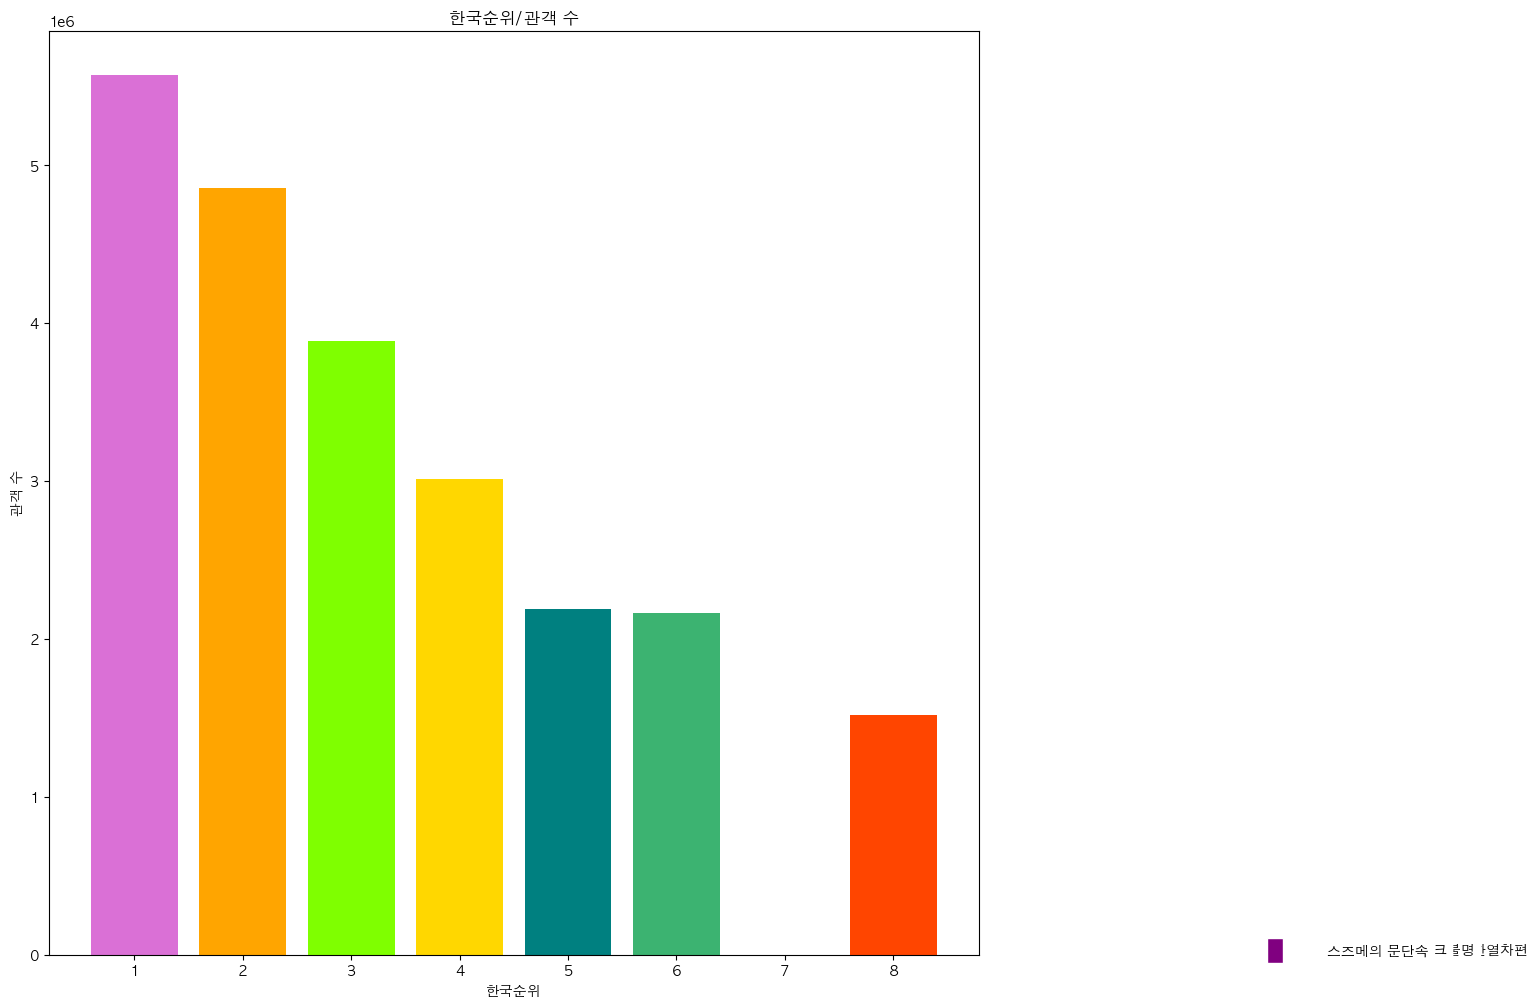

In [ ]:
animeFunc('한국순위', '관객 수')

In [ ]:
anime4['관객 수']

0    2189110
1    2167573
2    3889286
3    3015165
4    4856640
5    1521842
6    5575035
Name: 관객 수, dtype: int64